In [1]:
%matplotlib inline

# Importing the requires libraries
import wave
import numpy as np
import matplotlib

# 01. Introduction to Spoken Language Processing with Python

Audio files are different from most other types of data. Before you can start working with them, they require some preprocessing. In this chapter, you'll learn the first steps to working with speech files by converting two different audio files into soundwaves and comparing them visually.

## 01.01 Introduction to audio data in Python

See the video.

**Examples from the video - Opening an audio file in Python**

In [2]:
# Import audio file as wave object
good_morning = wave.open("good_morning.wav", "r")
good_morning

In [3]:
# Convert wave object to bytes
soundwave_gm = good_morning.readframes(-1)
print(type(soundwave_gm))
print(soundwave_gm[:10])

<class 'bytes'>
b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


In [4]:
# To display variable info
%whos 

Variable       Type         Data/Info
-------------------------------------
good_morning   Wave_read    <wave.Wave_read object at 0x0000019D937598E0>
matplotlib     module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np             module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
soundwave_gm   bytes        b'\xfd\xff\xfb\xff\xf8\xf<...>\x00?\x00B\x008\x00=\x00'
wave           module       <module 'wave' from 'C:\\<...>tascience\\lib\\wave.py'>


## 01.02 The right frequency

**Instructions:**<br>
Movies play multiple pictures per second succession to give the illusion of moving pictures, sound is similar but usually at a much larger rate. What's the standard unit of measure for sound frequency?

**Possible Answers:**
1. FPS (frames per second)
2. SPS (sound per second)
3. __Hz (Hertz)__
4. WPS (waves per second)

**Results:**<br>
<font color=darkgreen>That's it! Our audio files have been 48 kHz so far, that's 48,000 cycles per second!</font>

## 01.03 Importing an audio file with Python

You've seen how there are different kinds of audio files and how streaming music and spoken language have different sampling rates. But now we want to start working with these files.

To begin, we're going to import the good_morning.wav audio file using Python's in-built wave library. Then we'll see what it looks like in byte form using the built-in readframes() method.

You can listen to good_morning.wav here: https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav.

Remember, good_morning.wav is only a few seconds long but at 48 kHz, that means it contains 48,000 pieces of information per second.

**Instructions:**
1. Import the Python wave library.
2. Read in the good_morning.wav audio file and save it to good_morning.
3. Create signal_gm by reading all the frames from good_morning using readframes().
4. See what the first 10 frames of audio look like by slicing signal_gm.

**Result**<br>
<font color=darkgreen>_Boom! You've just imported your first audio file and seen what it looks like with pure Python. Now let's convert it something more readable._</font>

In [5]:
# Create audio file wave object
good_morning = wave.open("good_morning.wav", 'r')

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


## 01.04 Converting sound wave bytes to integers

See the video.

**Examples from the video - Converting bytes to integers**

In [6]:
# Convert soundwave_gm from bytes to integers
signal_gm = np.frombuffer(soundwave_gm, dtype='int16')

# Show the first 10 items
signal_gm[:10]

array([ -3,  -5,  -8,  -8,  -9, -13,  -8, -10,  -9, -11], dtype=int16)

In [7]:
len(signal_gm)

249984

**Examples from the video - Finding the frame rate**

In [8]:
# Get the frame rate
framerate_gm = good_morning.getframerate()

# Show the frame rate
framerate_gm

48000

In [9]:
#Duration of audio file (seconds) = length of wave objects / frequency (Hz)
len(signal_gm) / framerate_gm

5.208

**Examples from the video - Finding sound wave timestamps**

In [10]:
# Get the timestamps of the good morning sound wave
time_gm = np.linspace(start = 0, 
                      stop  = len(soundwave_gm)/framerate_gm, 
                      num   = len(soundwave_gm))
time_gm

array([0.00000000e+00, 2.08333750e-05, 4.16667500e-05, ...,
       1.04159583e+01, 1.04159792e+01, 1.04160000e+01])

_Each of this values is the time in seconds where each sound have wave byte occurred_

## 01.05 The right data type

**Instructions:**<br>


<code>dtype</code> defaults to float in <code>np.frombuffer()</code>, what's the correct <code>dtype</code> to set it to for visualizing sound wave bytes?

You can try the different options by running<br>
<code>np.frombuffer(signal_gm, dtype=____)</code> 

**Possible Answers:**
1. float
2. __int16__
3. np.uint8
4. string

**Results:**<br>
<font color=darkgreen>Nice! The 'int16' data type returns positive and negative integers, just as we wanted. Our sound wave integers will be ready to plot in no time!</font>

In [11]:
print(np.frombuffer(signal_gm, dtype=float))
print(np.frombuffer(signal_gm, dtype='int16'))
print(np.frombuffer(signal_gm, dtype=np.uint8))

[            nan             nan             nan ... 1.44634554e-307
 2.00267003e-307 1.61322608e-307]
[-3 -5 -8 ... 66 56 61]
[253 255 251 ...   0  61   0]


## 01.06 Bytes to integers

You've seen how to import and read an audio file using Python's <code>wave</code> module and the <code>readframes()</code> method. But doing that results in an array of bytes.

To convert the bytes into something more useful, we'll use NumPy's <code>frombuffer()</code> method.

Passing <code>frombuffer()</code> our sound waves bytes and indicating a <code>dtype</code> of <code>'int16'</code>, we can convert our bytes to integers. Integers are much easier to work with than bytes.

The Python <code>wave</code> library has already been imported along with the <code>good_morning.wav</code> audio file. 

**Instructions:**<br>
1. Import the numpy package with its common alias np.
2. Open and read the good morning audio file.
3. Convert the signal_gm bytes to int16 integers.
4. View the first 10 sound wave values.

**Results:**<br>
<font color=darkgreen>Great effort! You've read in an audio file with Python and converted into to integers, that's the first step towards speech recognition!</font>

In [12]:
# Open good morning sound wave and read frames as bytes
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10])

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]


## 01.07 Finding the time stamps

We know the frequency of our sound wave is 48 kHz, but what if we didn't? We could find it by dividing the length of our sound wave array by the duration of our sound wave. However, Python's <code>wave</code> module has a better way. Calling <code>getframerate()</code> on a wave object returns the frame rate of that wave object.

We can then use NumPy's <code>linspace()</code> method to find the time stamp of each integer in our sound wave array. This will help us visualize our sound wave in the future.

The <code>linspace()</code> method takes <code>start</code>, <code>stop</code> and <code>num</code> parameters and returns <code>num</code> evenly spaced values between <code>start</code> and <code>stop</code>.

In our case, <code>start</code> will be zero, <code>stop</code> will be the length of our sound wave array over the frame rate (or the duration of our audio file) and <code>num</code> will be the length of our sound wave array.

**Instructions:**<br>
1. Convert the sound wave bytes to integers.
2. Get the frame rate of the good morning audio file using getframerate().
3. Set stop to be the length of soundwave_gm over the frame rate.
4. Set num to be the length of soundwave_gm.

**Results:**<br>
<font color=darkgreen>Nice! You've done some great data manipulation to our good morning sound wave. Now we'll use all your hard work to plot it and see what it looks like!</font>

In [13]:
# Read in sound wave and convert from bytes to integers
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


## 01.08 Visualizing sound waves

See the video.

**Examples from the video**

In [14]:
# Read good_afternoon.wav
good_afternoon = wave.open('good_afternoon.wav', 'r')
signal_ga = good_afternoon.readframes(-1)
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga,
                      num=len(soundwave_ga))

# Print the first 10 timestamps
print(time_ga[:10])

[0.00000000e+00 2.08333960e-05 4.16667921e-05 6.25001881e-05
 8.33335841e-05 1.04166980e-04 1.25000376e-04 1.45833772e-04
 1.66667168e-04 1.87500564e-04]


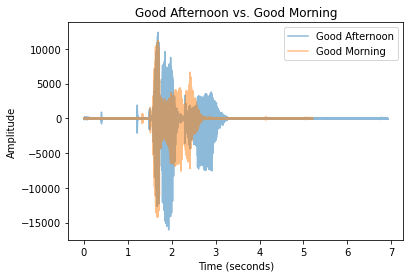

In [15]:
# Initialize figure and setup title
plt.title("Good Afternoon vs. Good Morning")

# x and y axis labels
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Add good morning and good afternoon values
plt.plot(time_ga, soundwave_ga, label ="Good Afternoon", alpha=0.5)
plt.plot(time_gm, soundwave_gm, label="Good Morning", alpha=0.5)

# Create a legend and show our plot
_ = plt.legend()
#plt.show()

## 01.09 Staying consistent

**Instructions:**<br>
Why is it important to ensure the same data transformations are performed on all of your audio files?

**Possible Answers:**
1. So data can be processed faster.
2. Only performing transformations on one audio file is okay.
3. Audio files don't have to be transformed, if you can hear it, it's ready.
4. __To ensure data consistency and prevent potential data mismatches.__

**Results:**<br>
<font color=darkgreen>Correct! Performing the same transformations on all of audio files, allows us to work with them in a consistent manner.</font>

## 01.10 Processing audio data with Python

You've seen how a sound waves can be turned into numbers but what does all that conversion look like?

And how about another similar sound wave? One slightly different?

In this exercise, we're going to use MatPlotLib to plot the sound wave of <code>good_morning</code> against <code>good_afternoon</code>.

To have the <code>good_morning</code> and <code>good_afternoon</code> sound waves on the same plot and distinguishable from each other, we'll use MatPlotLib's <code>alpha</code> parameter.

You can listen to the <code>good_morning</code> audio here https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav 
and <code>good_afternoon</code> audio here https://assets.datacamp.com/production/repositories/4637/datasets/16379ca3c3689f5f7cfb3de20585cb6da609294b/good-afternoon.wav

**Instructions:**<br>
1. Set the title to reflect the plot we are making.
2. Add the good_afternoon time variable (time_ga) and amplitude variable (soundwave_ga) to the plot.
3. Do the same with the good_morning time variable (time_gm) and amplitude variable (soundwave_gm) to the plot.
4. Set the alpha variable to 0.5.

**Results:**<br>
<font color=darkgreen>Great effort! Notice the two sound waves are very similar in the beginning. Because the first word is "good" in both audio files, they almost completely overlap. A well-built speech recognition system would recognize this and return the same first word for each wave. Let's build one to do just that.</font>

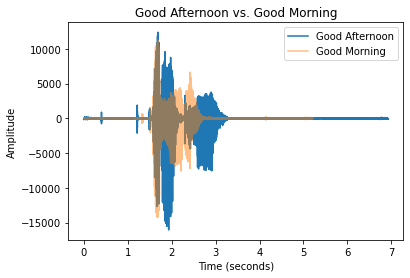

In [16]:
# Setup the title and axis titles
plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning',
   # Set the alpha variable to 0.5
   alpha=0.5)

_ = plt.legend()
#plt.show()

**Another example - Good Morning from two different voices**

In [17]:
# Define a funtion to make the transformations
def transform_wav_files(wav_file):
    # Read the wav file
    wf = wave.open(wav_file, 'r')
    signal = wf.readframes(-1)
    soundwave = np.frombuffer(signal, dtype='int16')

    # Get the sound wave frame rate
    framerate = wf.getframerate()

    # Find the sound wave timestamps
    time = np.linspace(start=0, stop=len(soundwave)/framerate, num=len(soundwave))
    
    return wf, soundwave, time

In [18]:
wav_files_to_compare = ['good_morning.wav', 'good_morning_jacesca.wav']
' vs '.join(wav_files_to_compare)

'good_morning.wav vs good_morning_jacesca.wav'

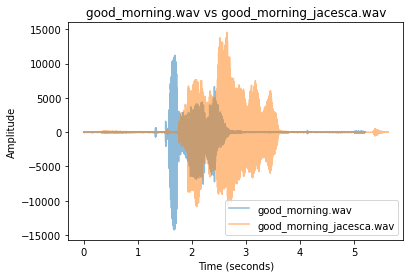

In [19]:
wav_files_to_compare = ['good_morning.wav', 'good_morning_jacesca.wav']

# Setup the title and axis titles
plt.title(' vs '.join(wav_files_to_compare))
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

for file in wav_files_to_compare:
    # Get data from file
    wf, soundwave, time = transform_wav_files(file)
    
    # Add data to the plot
    plt.plot(time, soundwave, label=file, alpha=0.5)


_ = plt.legend()
#plt.show()

# Aditional material

- **Online Voice Recorder & Audio Cutter**: https://voice-recorder-online.com/
- **Datacamp course**: https://learn.datacamp.com/courses/spoken-language-processing-in-python